In [1]:
#sklearn 做非线性逻辑回归
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.metrics import classification_report
# from sklearn import preprocessing
from sklearn.datasets import make_gaussian_quantiles
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

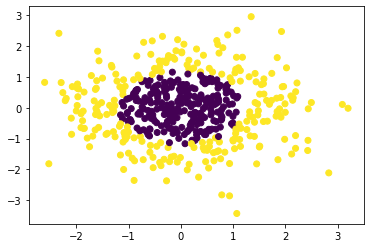

In [2]:
x_data, y_data = make_gaussian_quantiles(n_samples= 500, n_features=2, n_classes=2)

plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
plt.show()

(164220,)


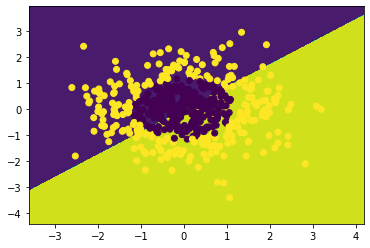

score 0.518


In [3]:
logistic = linear_model.LogisticRegression()
logistic.fit(x_data, y_data)
#获取范围
x_min, x_max =x_data[:, 0].min()-1, x_data[:, 0].max()+1
y_min, y_max =x_data[:, 1].min()-1, x_data[:, 1].max()+1
#生成网格矩阵
xx,yy =np.meshgrid(np.arange(x_min, x_max, 0.02),
                            np.arange(y_min,y_max,0.02))

z =logistic.predict(np.c_[xx.ravel(), yy.ravel()])
for  i in range(len(z)):
    if z[i] >0.5:
        z[i] = 1
    else:
        z[i] = 0
print(z.shape)
z = z.reshape(xx.shape)

cs =plt.contourf(xx,yy,z)
plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
plt.show()
print('score',logistic.score(x_data,y_data))

In [14]:
#定义多项式回归

poly_reg = PolynomialFeatures(degree=5)
x_poly = poly_reg.fit_transform(x_data)

print(x_poly.shape)

logistic = linear_model.LogisticRegression()
logistic.fit(x_poly, y_data)

(500, 21)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

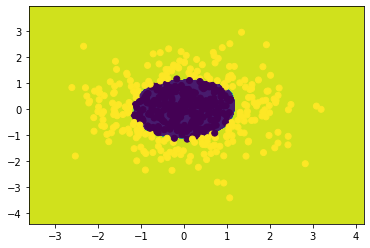

score: 0.988


In [10]:
#获取范围
x_min, x_max =x_data[:, 0].min()-1, x_data[:, 0].max()+1
y_min, y_max =x_data[:, 1].min()-1, x_data[:, 1].max()+1
#生成网格矩阵
xx,yy =np.meshgrid(np.arange(x_min, x_max, 0.02),
                            np.arange(y_min,y_max,0.02))

z =logistic.predict(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]))#注意这块的处理，多项式的特征值，然后在取值范围内
z = z.reshape(xx.shape)
cs = plt.contourf(xx, yy, z)

plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
plt.show()
print('score:', logistic.score(x_poly, y_data))
